## TensorFlow i Keras

### TensoFlow

- TensorFlow to otwarta biblioteka do uczenia maszynowego i obliczeń numerycznych.
- Została stworzona przez Google i jest stosowana zarówno w biznesie, jak i w badaniach naukowych.
- Obsługuje obliczenia na różnych platformach, w tym CPU, GPU i TPU.
- Zapewnia elastyczność i skalowalność, umożliwiając tworzenie złożonych modeli uczenia maszynowego.
- Posiada bogaty ekosystem narzędzi i bibliotek, takich jak TensorFlow Extended (TFX) dla przetwarzania danych i TensorFlow Lite dla urządzeń mobilnych.
- Jest wykorzystywana w różnych dziedzinach, takich jak grafika komputerowa, przetwarzanie języka naturalnego i uczenie wzmacniane.
- Obsługuje wiele języków programowania, w tym Python, C++ i JavaScript.

### Keras

- Keras to wysokopoziomowe API do budowania i trenowania modeli uczenia głębokiego.
- Został stworzony przez François Cholleta i jest obecnie integralną częścią TensorFlow.
- Umożliwia łatwe i szybkie prototypowanie modeli sieci neuronowych.
- Obsługuje zarówno modele sekwencyjne, jak i funkcjonalne, umożliwiając tworzenie złożonych architektur.
- Posiada bogaty zestaw wstępnie zdefiniowanych warstw, funkcji aktywacji i optymalizatorów.
- Jest kompatybilne z różnymi "backendami", takimi jak TensorFlow, Theano i CNTK.
- Jest szeroko stosowane w biznesie i badaniach naukowych dzięki swojej prostocie i elastyczności.


### Przykłady (wykorzystujące standardowe pliki z danymi)

1. Zagadnienie regresji - przewidywanie cen nieruchomości (dane z pliku "Boston Housing")

- Cel:

 - Celem jest zbudowanie modelu, który będzie w stanie przewidywać cenę nieruchomości na podstawie dostarczonych cech. Model powinien być w stanie podać dokładne przewidywania cen domów, których danych nie "widział" podczas uczenia.

- Zadanie:

 - Jest to zagadnienie regresji, w którym chodzi o przewidywanie pewnej ciągłej wartości (mianowicie ceny nieruchomości) na podstawie zestawu cech. W zadaniach regresji model uczy się odwzorowywać dane wejściowe (cechy) na wyjściowe (wartości ciągłe), takie jak cena, temperatura, wysokość, itp.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

# Normalizacja danych
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Budowa modelu
model = Sequential([
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1)
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Trenowanie modelu
model.fit(x_train, y_train, epochs=100, batch_size=10, validation_split=0.2)

# Ocena modelu
loss, mae_neural_network = model.evaluate(x_test, y_test)
print(f'Średni błąd bezwzględny: {mae_neural_network}')


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 513.1014 - mae: 20.9491 - val_loss: 499.5970 - val_mae: 20.5216
Epoch 2/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 370.9621 - mae: 17.2069 - val_loss: 236.1390 - val_mae: 13.4242
Epoch 3/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 158.9250 - mae: 10.4088 - val_loss: 71.5657 - val_mae: 6.5932
Epoch 4/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 66.3275 - mae: 6.1716 - val_loss: 41.1375 - val_mae: 4.8520
Epoch 5/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 44.8461 - mae: 4.7315 - val_loss: 29.8285 - val_mae: 4.1796
Epoch 6/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.6342 - mae: 4.1717 - val_loss: 24.7913 - val_mae: 3.8867
Epoch 7/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 23.2620 - mae: 3.3262 - val_loss: 22.5986 - val_mae: 3.7260
Epoch 8/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 21.7046 - mae: 3.1792 - val_loss: 20.8483 - val_mae: 3.5630
Epoch 9/100
33/33 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step

### Porównanie z wynikami algorytmów Ridge i Lasso

#### Algorytm Ridge

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_absolute_error

# Ładowanie zbioru danych 'Boston Housing' z OpenML
boston = fetch_openml(name='boston', version=1, as_frame=False)
X = boston.data
y = boston.target

# Podział danych na część treningową i testową
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalizacja danych
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definicja modelu Ridge
ridge_model = Ridge(alpha=1.0)

# Uczenie modelu Ridge
ridge_model.fit(X_train, y_train)

# Określenie jakości modelu Ridge
y_pred_ridge = ridge_model.predict(X_test)
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f'Średni błąd bezwzględny (Ridge): {mae_ridge}')

# Definicja modelu Lasso
lasso_model = Lasso(alpha=1.0)

# Uczenie modelu Lasso
lasso_model.fit(X_train, y_train)

# Określenie jakości modelu Lasso
y_pred_lasso = lasso_model.predict(X_test)
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f'Średni błąd bezwzględny (Lasso): {mae_lasso}')

print("-----------------------------------------------------------------------")

print("Porównanie wyników:")

print(f'Średni błąd bezwzględny (Neural Network): {mae_neural_network}')
print(f'Średni błąd bezwzględny (Ridge): {mae_ridge}')
print(f'Średni błąd bezwzględny (Lasso): {mae_lasso}')



Mean Absolute Error (Ridge): 3.185723807244598
Mean Absolute Error (Lasso): 3.473770443541664
-----------------------------------------------------------------------
Porównanie wyników:
Mean Absolute Error (Neural Network): 2.8105809688568115
Mean Absolute Error (Ridge): 3.185723807244598
Mean Absolute Error (Lasso): 3.473770443541664


#### Opis czynności

1. Wczytujemy zbiór danych Boston Housing i dzielimy go na zbiór treningowy i testowy.
2. Normalizujemy dane za pomocą StandardScaler.
3. Budujemy model sekwencyjny z trzema warstwami: dwie ukryte warstwy z funkcją aktywacji ReLU i jedna warstwa wyjściowa.
4. Kompilujemy model z optymalizatorem Adam, funkcją straty MSE (błąd średni kwadratowy) i metryką MAE (średni błąd bezwzględny).
5. Trenujemy model przez 100 epok z wielkością partii 10 i walidacją na 20% danych treningowych.

#### Uwagi

1. Warstwa gęsta (ang. "Dense") to warstwa, w której każdy neuron jest połączony z każdym neuronem w poprzedniej warstwie. Inaczej mówiąc, jest to warstwa pełnego połączenia (ang. "fully connected layer").  
Każdy neuron w warstwie gęstej otrzymuje dane wyjściowe z każdego neuronu w poprzedniej warstwie i przekazuje swoje dane wyjściowe do każdego neuronu w następnej warstwie.
2. Niektóre inne typy warstw:
- Warstwy konwolucyjne (Convolutional Layers):
 - Warstwy konwolucyjne są często używane w sieciach konwolucyjnych (CNN) do przetwarzania obrazów.
 - Każdy neuron w warstwie konwolucyjnej jest połączony tylko z małym obszarem (oknem) w poprzedniej warstwie, co pozwala na wykrywanie lokalnych cech w obrazie.
- Warstwy rekurencyjne (Recurrent Layers):
 - Warstwy rekurencyjne, takie jak LSTM (Long Short-Term Memory) i GRU (Gated Recurrent Unit), są używane w sieciach rekurencyjnych (RNN) do przetwarzania sekwencji danych, takich jak tekst lub sygnały czasowe.
 - Każdy neuron w warstwie rekurencyjnej ma połączenia z neuronami w poprzedniej warstwie oraz z neuronami w tej samej warstwie z poprzedniego kroku czasowego.
- Warstwy "pooling" (Pooling Layers):
 - Warstwy "pooling" są używane w sieciach konwolucyjnych do zmniejszenia rozmiaru danych i redukcji obliczeń.
 - Najczęściej używane są warstwy "max-pooling" i "average-pooling".
 - Warstwy normalizacyjne (Normalization Layers)
  - Warstwy normalizacyjne, takie jak "Batch Normalization", są używane do normalizacji danych w każdej warstwie, co może przyspieszyć trening i poprawić stabilność modelu.
- Warstwy "dropout" (Dropout Layers):
 - Warstwy dropout są używane do zapobiegania nadmiernemu dopasowaniu ("overfitting") poprzez losowe wyłączanie części neuronów podczas treningu.
3. Argumenty przekazywane do klasy "Dense":
- 64:
  - Liczba neuronów (units). Określa ona liczbę neuronów (lub jednostek) w danej warstwie. W tym przypadku warstwa będzie miała 64 neurony.
  - Znaczenie. Liczba neuronów w warstwie wpływa na zdolność modelu do uczenia się i reprezentowania złożonych wzorców w danych. Więcej neuronów może pozwolić na lepsze dopasowanie do danych, ale może także prowadzić do nadmiernego dopasowania (overfitting).

- activation='relu':
  - Funkcja aktywacji. Określa funkcję aktywacji, która będzie stosowana do wyjść neuronów w tej warstwie. W tym przypadku używana jest funkcja aktywacji ReLU (Rectified Linear Unit).
  - Znaczenie. Funkcja aktywacji wprowadza nieliniowość do modelu, co pozwala na uczenie się bardziej złożonych wzorców. ReLU jest popularną funkcją aktywacji, ponieważ jest prostą i wydajną funkcją, która pomaga w zapobieganiu problemowi zanikającego gradientu.

- input_shape=(x_train.shape[1],):
  - Kształt wejścia (input shape). Określa kształt danych wejściowych do tej warstwy. W tym przypadku x_train.shape[1] określa liczbę cech (lub wymiarów) w danych wejściowych.
  - Znaczenie. Argument input_shape jest wymagany tylko dla pierwszej warstwy w modelu sekwencyjnym. Określa, jakie dane wejściowe oczekuje model.
  Na przykład, jeśli x_train ma kształt (1000, 20), oznacza to, że dane wejściowe mają 1000 próbek, każda z 20 cechami. W takim przypadku input_shape będzie (20,).

4. Argumenty w metodzie kompilacji modelu (model.compile): "model.compile(optimizer='adam', loss='mse', metrics=['mae'])"

- optimizer='adam':
  - Optymalizator. Określa algorytm optymalizacji, który będzie używany do aktualizacji wag modelu podczas treningu.
  - Adam. Adam (Adaptive Moment Estimation) jest popularnym algorytmem optymalizacji, który łączy w sobie zalety algorytmów AdaGrad i RMSProp. Adam dostosowuje się do szybkości uczenia dla każdego parametru indywidualnie, co pozwala na szybkie i stabilne trenowanie.
  - Znaczenie. Wybór optymalizatora ma znaczący wpływ na szybkość i jakość treningu modelu. Adam jest często wybierany ze względu na swoją efektywność i stabilność.

- loss='mse':
 - Funkcja straty (loss function). Określa funkcję straty, która będzie używana do oceny, jak dobrze model dopasowuje się do danych treningowych.
 - MSE (Mean Squared Error). MSE jest funkcją straty, która oblicza średnią kwadratową różnicę między przewidywanymi wartościami a rzeczywistymi wartościami. Jest często używana w zadaniach regresji.
 - Znaczenie. Funkcja straty mierzy, jak dobrze model przewiduje wyniki. MSE jest popularną funkcją straty dla zadań regresji, ponieważ kara jest wyższa za duże błędy niż za małe.

- metrics=['mae']:
 - Metryki. Określa metryki, które będą monitorowane podczas treningu i oceny modelu. Metryki te nie wpływają bezpośrednio na proces treningu, ale są używane do oceny jakości modelu.
 - MAE (Mean Absolute Error). MAE jest metryką, która oblicza średnią bezwzględną różnicę między przewidywanymi wartościami a rzeczywistymi wartościami. Ona także jest często używana w zadaniach regresji.
 - Znaczenie. Metryki pozwalają na lepsze zrozumienie wydajności modelu. MAE jest popularną metryką dla zadań regresji, ponieważ jest łatwa do interpretacji i daje dobre wgląd w średni błąd przewidywań.

5. Parametry "epochs" i "batch_size"

- epochs=100:
  - Epoki (epochs): Określa liczbę pełnych przebiegów przez cały zbiór danych treningowych.
  - Znaczenie: Podczas jednej epoki model przetwarza każdy przykład treningowy raz. Liczba epok określa, ile razy model przetworzy cały zbiór danych treningowych. Większa liczba epok może pozwolić modelowi na lepsze dopasowanie się do danych, ale może także prowadzić do nadmiernego dopasowania (overfitting).
  - Przykład: Jeśli mamy 1000 przykładów treningowych i ustawiamy epochs=100, model przetworzy każdy przykład treningowy 100 razy, co daje łącznie 100,000 przebiegów przez dane treningowe.


- batch_size=10:
 - Wielkość partii (batch size): Określa liczbę przykładów treningowych, które są przetwarzane razem w jednym kroku treningu.
 - Znaczenie: Wielkość partii wpływa na to, jak często wagi modelu są aktualizowane. Mniejsze partie mogą prowadzić do częstszych aktualizacji wag, co może przyspieszyć trening, ale może także wprowadzać większy szum do procesu treningu. Większe partie mogą stabilizować proces treningu, ale mogą wymagać więcej pamięci.
 - Przykład: Jeśli mamy 1000 przykładów treningowych i ustawimy batch_size=10, model przetworzy 10 przykładów treningowych w jednym kroku treningu. Cały zbiór danych treningowych zostanie podzielony na 100 partii (1000 / 10 = 100).

6. Różnica między danymi treningowymi i walidacyjnymi

- Cel:

  - Dane walidacyjne: Służą do monitorowania wydajności modelu podczas treningu i dostosowania hiperparametrów.
  - Dane testowe: Służą do ostatecznej oceny wydajności modelu po zakończeniu treningu.

- Użycie:

  - Dane walidacyjne: Mogą być używane wielokrotnie podczas treningu do dostosowania hiperparametrów i wykrycia nadmiernego dopasowania.
  - Dane testowe: Są używane tylko raz po zakończeniu treningu, aby uzyskać niezależną ocenę jakości modelu.

- Wpływ na uczenie:

  - Dane walidacyjne: Nie są używane bezpośrednio do aktualizacji wag modelu, ale ich wyniki mogą wpływać na decyzje dotyczące hiperparametrów i zatrzymania treningu.
  - Dane testowe: Nie mają żadnego wpływu na proces treningu i są używane wyłącznie do oceny ostatecznej wydajności modelu.

### Klasyfikacja cyfr pisanych odręcznie

#### Opis czynności

1. Wczytujemy zbiór danych MNIST i normalizujemy obrazy.
Konwertujemy etykiety do postaci kategorialnej za pomocą to_categorical.
2. Budujemy model sekwencyjny z warstwą spłaszczającą, warstwą ukrytą z funkcją aktywacji ReLU i warstwą wyjściową z funkcją aktywacji softmax.
3. Kompilujemy model z optymalizatorem Adam, funkcją straty categorical_crossentropy i metryką accuracy.
4. Trenujemy model przez 10 epok z wielkością partii 32 i walidacją na 20% danych treningowych.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Konwersja etykiet do postaci kategorialnej
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Budowa modelu
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Ocena modelu
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8652 - loss: 0.4785 - val_accuracy: 0.9545 - val_loss: 0.1572
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9587 - loss: 0.1407 - val_accuracy: 0.9649 - val_loss: 0.1225
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9727 - loss: 0.0900 - val_accuracy: 0.9722 - val_loss: 0.0968
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9811 - loss: 0.0646 - val_accuracy: 0.9715 - val_loss: 0.0952
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9864 - loss: 0.0470 - val_accuracy: 0.9724 - val_loss: 0.0936
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9901 - loss: 0.0358 - val_accuracy: 0.9722 - val_loss: 0.1005
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9904 - loss: 0.0317 - val_accuracy: 0.9738 - val_loss: 0.0937
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9933 - loss: 0.0238 - 

### Uwagi:

1. Linia: "Flatten(input_shape=(28, 28))" ma następujący sens:

- Flatten
  - Flatten to tzw. "warstwa spłaszczająca" w sieci neuronowej, która przekształca wielowymiarowe dane wejściowe (np. obrazy) w jednowymiarowy wektor.
  - Warstwa taka jest przydatna, gdy chcemy przekształcić dane z formatu macierzy (np. obraz 28x28 pikseli) do formatu wektora (np. wektor o długości 784), aby można było przekazać je do warstwy gęstej (Dense).

- input_shape=(28, 28):
  - Parametr 'input_shape' określa kształt danych wejściowych do warstwy (w tym przypadku spłaszczającej).
  - input_shape=(28, 28) oznacza, że dane wejściowe są obrazami o rozmiarze 28x28 pikseli.
  - Warstwa Flatten przekształca te dane wejściowe z kształtu (28, 28) na kształt (784,), czyli jednowymiarowy wektor o długości 784.

2. Kategorialna entropia krzyżowa (categorical_crossentropy)
- "categorical_crossentropy" to funkcja straty używana w zadaniach klasyfikacji, gdzie etykiety są zakodowane jako wektory jednokierunkowe (za pomocą procedury "one-hot encoding").
- Jest to miara różnicy między przewidywanymi prawdopodobieństwami klas a rzeczywistymi etykietami klas.
- Funkcja ta jest często używana w zadaniach klasyfikacji wieloklasowej, gdzie model musi przewidzieć, do której z wielu klas należy dany przykład.


### Klasyfikacja obrazów związanych z odzieżą

Fashion MNIST to zbiór danych zawierający 70,000 obrazów odzieży i obuwia w skali szarości, podzielonych na 10 różnych klas. Każdy obraz ma rozmiar 28x28 pikseli. Zbiór danych jest podzielony na zbiór treningowy (60,000 obrazów) i zbiór testowy (10,000 obrazów).

Zawiera on 10 klas, każda reprezentująca jakiś rodzaj ubrania:
T-shirty, spodnie, swetry, dresy, płaszcze, sandały, bluzki, adidasy, torby, buty "za kostkę".



29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


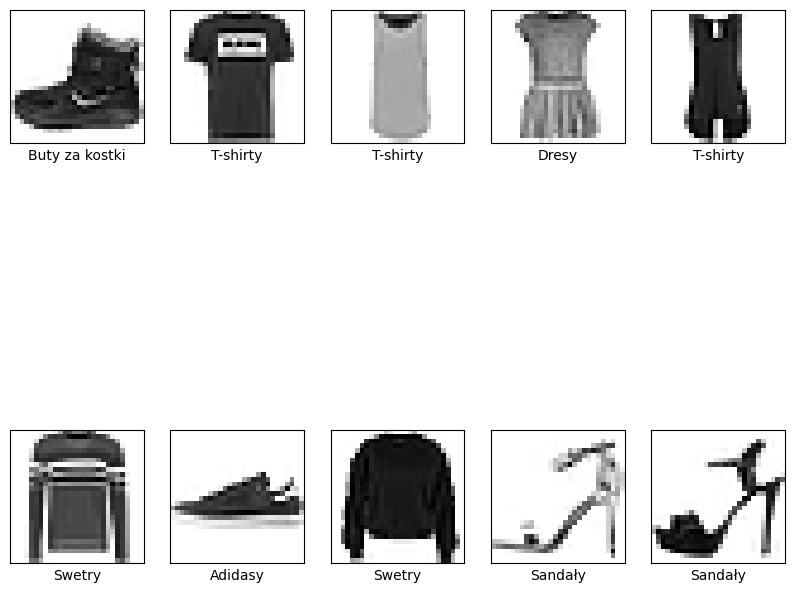

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Wyświetlenie przykładowych obrazów
nazwy_klas = ['T-shirty', 'Spodnie', 'Swetry', 'Dresy', 'Płaszcze', 'Sandały', 'Bluzki', 'Adidasy', 'Torby', 'Buty za kostki']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(nazwy_klas[y_train[i]])
plt.show()


#### Opis czynności

1. Wczytujemy zbiór danych Fashion MNIST i normalizujemy obrazy.
Konwertujemy etykiety do postaci kategorialnej za pomocą to_categorical.
2. Budujemy model sekwencyjny z warstwą spłaszczającą, warstwą ukrytą z funkcją aktywacji ReLU i warstwą wyjściową z funkcją aktywacji softmax.
3. Kompilujemy model z optymalizatorem Adam, funkcją straty categorical_crossentropy i metryką accuracy.
4. Trenujemy model przez 10 epok z wielkością partii 32 i walidacją na 20% danych treningowych.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Konwersja etykiet do postaci kategorialnej
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Budowa modelu
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

# Ocena modelu
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.7744 - loss: 0.6431 - val_accuracy: 0.8422 - val_loss: 0.4261
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8556 - loss: 0.4017 - val_accuracy: 0.8659 - val_loss: 0.3722
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8716 - loss: 0.3524 - val_accuracy: 0.8723 - val_loss: 0.3534
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8809 - loss: 0.3240 - val_accuracy: 0.8777 - val_loss: 0.3438
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8868 - loss: 0.3020 - val_accuracy: 0.8825 - val_loss: 0.3266
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8946 - loss: 0.2832 - val_accuracy: 0.8791 - val_loss: 0.3413
Epoch 7/10
1500/1500 ━━━━━━━━━━

### Klasyfikacja obrazów CIFAR-10

#### Opis zbioru danych CIFAR-10

- CIFAR-10 to zbiór danych zawierający 60,000 obrazów kolorowych o rozmiarze 32x32 pikseli, podzielonych na 10 różnych klas.
- Każdy obraz jest reprezentowany przez trzy kanały kolorów (czerwony, zielony, niebieski).
- Zbiór danych jest podzielony na zbiór treningowy (50,000 obrazów) i zbiór testowy (10,000 obrazów).

#### Klasy w zbiorze danych

Zbiór danych CIFAR-10 zawiera 10 klas, każda reprezentująca rodzaj obiektu:
samolot, samochód, ptak, kot, jeleń, pies, żaba, koń, statek, ciężarówka.








170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


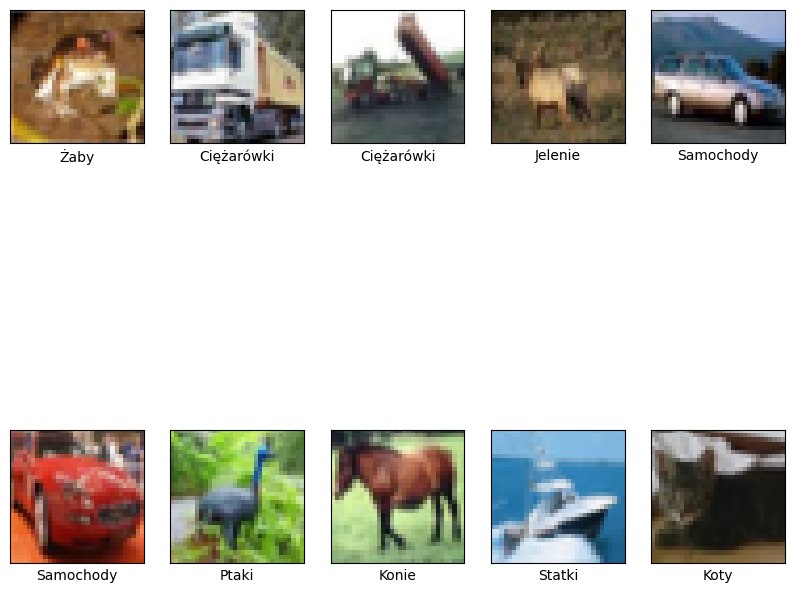

In [ ]:
# Przykłady:

import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Wyświetlenie przykładowych obrazów
nazwy_klas = ['Samoloty', 'Samochody', 'Ptaki', 'Koty', 'Jelenie', 'Psy', 'Żaby', 'Konie', 'Statki', 'Ciężarówki']

plt.figure(figsize=(10, 10))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    plt.xlabel(nazwy_klas[y_train[i][0]])
plt.show()


#### Opis czynności

1. Wczytujemy zbiór danych CIFAR-10 i normalizujemy obrazy.
Konwertujemy etykiety do postaci kategorialnej za pomocą to_categorical.
2. Budujemy model sekwencyjny z warstwami konwolucyjnymi, warstwami max-pooling, warstwą spłaszczającą, warstwą ukrytą z funkcją aktywacji ReLU i warstwą wyjściową z funkcją aktywacji softmax.
3. Kompilujemy model z optymalizatorem Adam, funkcją straty categorical_crossentropy i metryką accuracy.
4. Trenujemy model przez 10 epok z wielkością partii 64 i walidacją na 20% danych treningowych.

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Konwersja etykiet do postaci kategorialnej
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Budowa modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Ocena modelu
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')


170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 56s 87ms/step - accuracy: 0.2992 - loss: 1.8736 - val_accuracy: 0.4835 - val_loss: 1.4116
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 82ms/step - accuracy: 0.5171 - loss: 1.3463 - val_accuracy: 0.5763 - val_loss: 1.1961
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 85ms/step - accuracy: 0.5950 - loss: 1.1501 - val_accuracy: 0.6212 - val_loss: 1.0768
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 83ms/step - accuracy: 0.6303 - loss: 1.0444 - val_accuracy: 0.6452 - val_loss: 1.0075
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 80ms/step - accuracy: 0.6667 - loss: 0.9542 - val_accuracy: 0.6495 - val_loss: 1.0000
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 79ms/step - accuracy: 0.6855 - loss: 0.9011 - val_accuracy: 0.6695 - val_loss: 0.9453
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 77ms/step - accuracy: 0.7063 - loss: 0.8323 - val_accuracy: 0.6990 - val_loss: 0.8761
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 83s 79ms/step - accuracy: 0.7265 - loss: 0.7823 - 

#### Uwagi



1.    Conv2D:
        - Conv2D to warstwa konwolucyjna, która jest często używana w sieciach konwolucyjnych (CNN) do przetwarzania obrazów. Warstwa ta stosuje operację konwolucji do danych wejściowych, co pozwala na wykrywanie lokalnych cech w obrazie.

2.    Arugment "32":
        - Jest to tzw. liczba filtrów (filters). Określa liczbę filtrów (lub jąder konwolucyjnych) w tej warstwie. W tym przypadku warstwa będzie miała 32 filtry.
        - Znaczenie: liczba filtrów określa, ile różnych cech będzie wykrywanych w tej warstwie. Więcej filtrów pozwala na wykrywanie większej liczby cech, ale zwiększa złożoność obliczeniową.

3.    Argument (3, 3):
        - Rozmiar filtra (kernel size): Określa rozmiar filtra konwolucyjnego. W tym przypadku filtr ma rozmiar 3x3 pikseli.
        - Znaczenie: rozmiar filtra określa, jak duży obszar obrazu jest przetwarzany jednocześnie. Mniejsze filtry mogą wykrywać bardziej lokalne cechy, podczas gdy większe filtry mogą wykrywać bardziej globalne cechy.

4.    Argument activation='relu':
        - Funkcja aktywacji: określa funkcję aktywacji, która będzie stosowana do wyjść neuronów w tej warstwie. W tym przypadku używana jest funkcja aktywacji ReLU (Rectified Linear Unit).
        - Znaczenie: funkcja aktywacji wprowadza nieliniowość do modelu, co pozwala na uczenie się bardziej złożonych wzorców. ReLU jest popularną funkcją aktywacji, ponieważ jest prostą i wydajną funkcją, która pomaga w zapobieganiu problemowi zanikającego gradientu.

5.   Argument input_shape=(32, 32, 3):
        - Kształt wejścia (input shape): Określa kształt danych wejściowych do tej warstwy. W tym przypadku input_shape=(32, 32, 3) oznacza, że dane wejściowe są obrazami o rozmiarze 32x32 pikseli z trzema kanałami kolorów (czerwony, zielony, niebieski).
        - Znaczenie: argument "input_shape" jest wymagany tylko dla pierwszej warstwy w modelu sekwencyjnym. Określa, jakie dane wejściowe oczekuje model. Na przykład, jeśli x_train ma kształt (50000, 32, 32, 3), oznacza to, że mamy 50000 obrazów, każdy o rozmiarze 32x32 pikseli z trzema kanałami kolorów.
        
6.   MaxPooling2D:
        - MaxPooling2D to warstwa, która jest często używana w sieciach konwolucyjnych (CNN) do zmniejszenia rozmiaru danych i redukcji obliczeń.

7.   Argument (2, 2):
        - Rozmiar okna ("pool size:). Określa on rozmiar okna, w którym jest wykonywana operacja "max-pooling". W tym przypadku rozmiar okna to 2x2 pikseli.
        - Znaczenie: rozmiar okna określa, jak duży obszar obrazu jest przetwarzany jednocześnie. W tym przypadku, dla każdego okna 2x2 pikseli, warstwa wybiera największą wartość (maksimum) z tego okna i przekazuje ją dalej.


### Klasyfikacja obrazów CIFAR-100

####  Opis zbioru danych CIFAR-100

- CIFAR-100 to zbiór danych zawierający 60,000 obrazów kolorowych o rozmiarze 32x32 pikseli, podzielonych na 100 różnych klas.
- Każdy obraz jest reprezentowany przez trzy kanały kolorów (czerwony, zielony, niebieski).
- Zbiór danych jest podzielony na zbiór treningowy (50,000 obrazów) i zbiór testowy (10,000 obrazów).

##### Klasy w zbiorze danych

Zbiór danych CIFAR-100 zawiera 100 klas, każda reprezentująca rodzaj obiektu. Klasy są podzielone na 20 nadkategorii, każda zawierająca 5 klas. Na przykład kategoria "duże drapieżniki" zawiera obrazu niedźwiedzia, lamparta, lwa, tygrysa i wilka.


### Opis czynności


1.     Wczytujemy zbiór danych CIFAR-100 i normalizujemy obrazy.
2.     Konwertujemy etykiety do postaci kategorialnej za pomocą to_categorical.
3.     Budujemy model sekwencyjny z warstwami konwolucyjnymi, warstwami max-pooling, warstwą spłaszczającą, warstwą ukrytą z funkcją aktywacji ReLU i warstwą wyjściową z funkcją aktywacji softmax.
4.     Kompilujemy model z optymalizatorem Adam, funkcją straty 5. categorical_crossentropy i metryką accuracy.
5.     Trenujemy model przez 10 epok z wielkością partii 64 i walidacją na 20% danych treningowych.


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.utils import to_categorical

# Wczytanie danych
(x_train, y_train), (x_test, y_test) = cifar100.load_data()

# Normalizacja danych
x_train = x_train / 255.0
x_test = x_test / 255.0

# Konwersja etykiet do postaci kategorialnej
y_train = to_categorical(y_train, 100)
y_test = to_categorical(y_test, 100)

# Definicja modelu
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(100, activation='softmax')
])

# Kompilacja modelu
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Trenowanie modelu
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Ocena modelu
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {accuracy}')


169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 60s 93ms/step - accuracy: 0.0385 - loss: 4.3662 - val_accuracy: 0.1339 - val_loss: 3.6665
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 85ms/step - accuracy: 0.1594 - loss: 3.5290 - val_accuracy: 0.1928 - val_loss: 3.3270
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 51s 81ms/step - accuracy: 0.2309 - loss: 3.1437 - val_accuracy: 0.2552 - val_loss: 3.0626
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.2745 - loss: 2.9054 - val_accuracy: 0.2850 - val_loss: 2.8793
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 84ms/step - accuracy: 0.3121 - loss: 2.7242 - val_accuracy: 0.2932 - val_loss: 2.8424
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 91s 99ms/step - accuracy: 0.3370 - loss: 2.5957 - val_accuracy: 0.3234 - val_loss: 2.7090
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 70s 81ms/step - accuracy: 0.3650 - loss: 2.4614 - val_accuracy: 0.3269 - val_loss: 2.6935
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 78ms/step - accuracy: 0.3807 - loss: 2.3825 - 